Import the Data

In [1]:
import pandas as pd
from pathlib import Path
#import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# Import the data by reading in the CSV file and setting the DatetimeIndex 
# Review the first 5 rows of the DataFrame

NAV_df = pd.read_csv(
    Path("./Resources/whale_navs.csv"),
    index_col = "date",
    parse_dates=True,
    infer_datetime_format=True)

NAV_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-01,31.950240,14.991826,59.977830,51.948712,194.35
2014-10-02,31.936110,14.994072,59.978626,51.957619,194.38
2014-10-03,31.969707,14.999596,60.002264,52.022484,196.52
2014-10-06,32.048215,14.999471,60.006244,52.036387,196.29
2014-10-07,31.964216,14.994720,59.993735,52.005864,193.26


In [3]:
# Prepare for the analysis by converting the dataframe of NAVs and prices to daily returns
# Drop any rows with all missing values
# Review the first five rows of the daily returns DataFrame.

daily_returns = NAV_df.pct_change().dropna()

daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-02,-0.000442,0.000150,0.000013,0.000171,0.000154
2014-10-03,0.001052,0.000368,0.000394,0.001248,0.011009
2014-10-06,0.002456,-0.000008,0.000066,0.000267,-0.001170
2014-10-07,-0.002621,-0.000317,-0.000208,-0.000587,-0.015436
2014-10-08,0.000390,0.000369,0.000242,0.000842,0.017489


Quantative Analysis

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='date'>

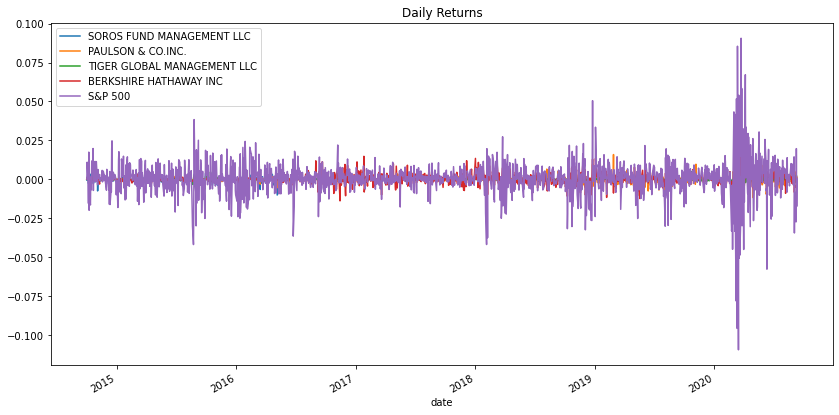

In [4]:
# Plot the daily return data of the 4 funds and the S&P 500 
# Inclue a title parameter and adjust the figure size

daily_returns.plot(figsize=(14,7), title = "Daily Returns")

In [5]:
# Calculate and plot the cumulative returns of the 4 fund portfolios and the S&P 500

cumulative_returns = (1 + daily_returns).cumprod()
cumulative_returns.tail()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2020-09-04,0.987355,0.958187,1.055714,1.244856,1.762645
2020-09-08,0.985640,0.956378,1.054373,1.238608,1.714484
2020-09-09,0.986739,0.958409,1.057221,1.240858,1.748341
2020-09-10,0.985498,0.959740,1.055539,1.237883,1.717983
2020-09-11,0.985086,0.957887,1.055081,1.236625,1.718858


<AxesSubplot:title={'center':'Cummulative Returns'}, xlabel='date'>

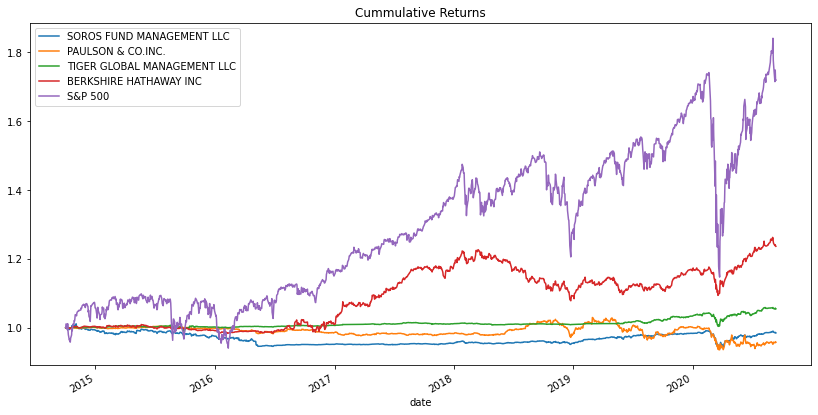

In [6]:
# Visualize the cumulative returns using the Pandas plot function
# Include a title parameter and adjust the figure size

cumulative_returns.plot(figsize=(14,7), title = "Cummulative Returns")

Question Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

Answer # No, none of the four fund portfolios outperform the S&P 500 Index.

Analyze the Volatility

<AxesSubplot:title={'center':'Volatility (4 Funds and S&P 500)'}>

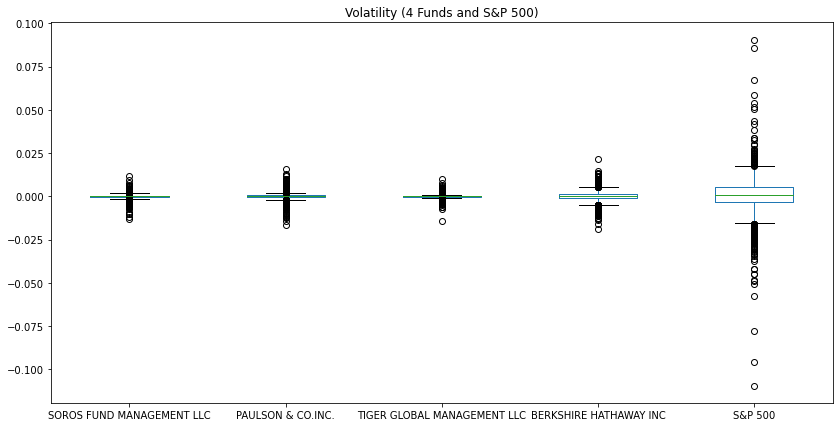

In [7]:
# Use the daily return data to create box plots to visualize the volatility of the 4 funds and the S&P 500 
# Include a title parameter and adjust the figure size

daily_returns.plot.box(legend=True, figsize=(14,7), title = "Volatility (4 Funds and S&P 500)")

<AxesSubplot:title={'center':'Returns (Excluding S&P 500)'}>

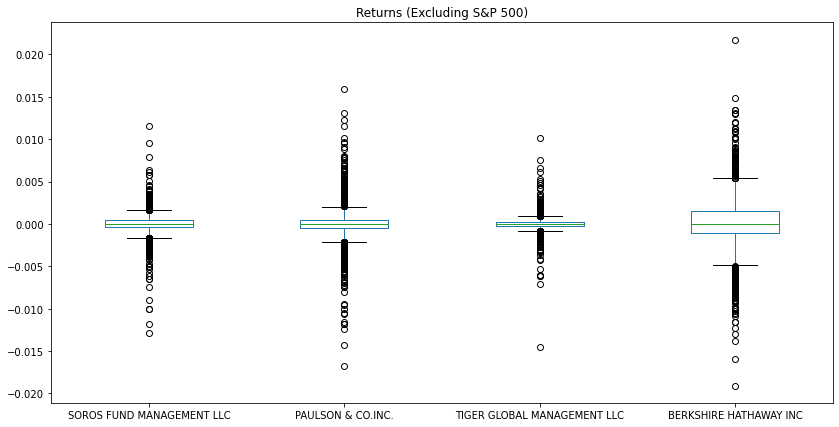

In [8]:
# Create a new DataFrame containing only the 4 fund portfolios by dropping the S&P 500 column from the DataFrame
# Create box plots to reflect the return data for only the 4 fund portfolios
# Include a title parameter and adjust the figure size

funds_df = daily_returns.drop(columns=["S&P 500"])

#funds_df.head()

funds_df.plot.box(legend=True, figsize=(14,7), title = "Returns (Excluding S&P 500)")

#funds_df.describe()

Question Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?

Answer # Based on the box plot visualization, Berkshire Hathaway is the most volatile and Tiger Global Management is the least volatile.

Analyze the Risk

In [9]:
# Calculate and sort the standard deviation for all 4 portfolios and the S&P 500
# Review the standard deviations sorted smallest to largest

std_dev = daily_returns.std()

#std_dev.head()

std_dev_sorted = std_dev.sort_values()
std_dev_sorted

TIGER GLOBAL MANAGEMENT LLC    0.000996
SOROS FUND MANAGEMENT LLC      0.001405
PAULSON & CO.INC.              0.002199
BERKSHIRE HATHAWAY INC         0.003256
S&P 500                        0.011550
dtype: float64

In [10]:
# Calculate and sort the annualized standard deviation (252 trading days) of the 4 portfolios and the S&P 500
# Review the annual standard deviations smallest to largest

annualized_std_dev = std_dev * np.sqrt(252)
annualized_std_dev.sort_values()

TIGER GLOBAL MANAGEMENT LLC    0.015804
SOROS FUND MANAGEMENT LLC      0.022297
PAULSON & CO.INC.              0.034912
BERKSHIRE HATHAWAY INC         0.051692
S&P 500                        0.183345
dtype: float64

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation'}, xlabel='date'>

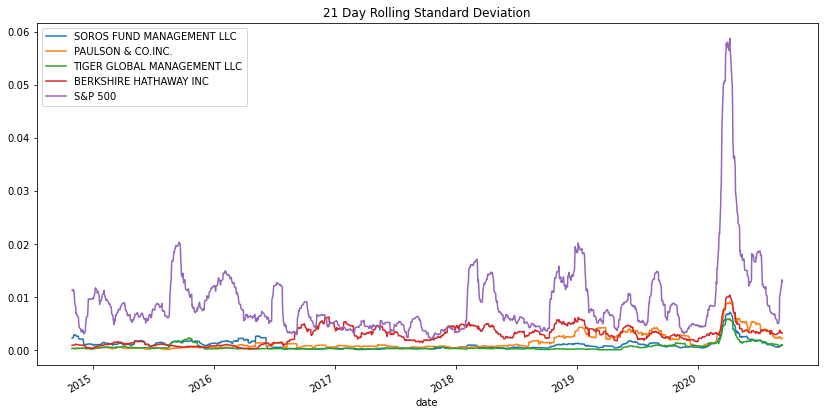

In [11]:
# Using the daily returns DataFrame and a 21-day rolling window, 
# plot the rolling standard deviation of the 4 portfolios and the S&P 500
# Include a title parameter and adjust the figure size

daily_returns.rolling(window=21).std().plot(legend=True, figsize=(14,7), title = "21 Day Rolling Standard Deviation")

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation (Excluding S&P 500)'}, xlabel='date'>

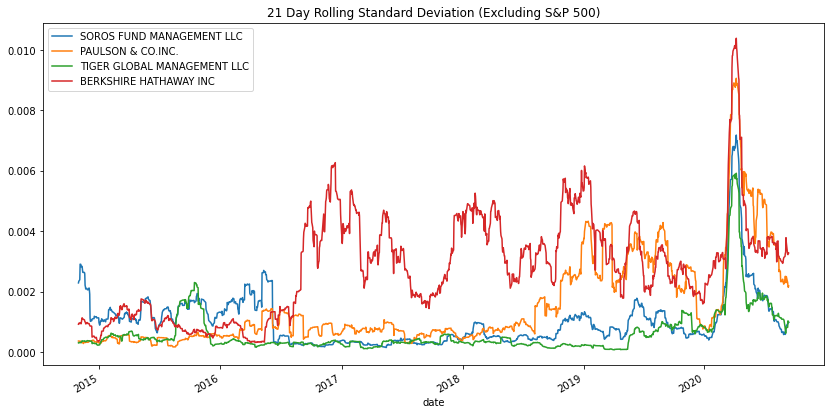

In [12]:
# Using the daily return data and a 21-day rolling window, plot the rolling standard deviation of just the 4 portfolios. 
# Include a title parameter and adjust the figure size

funds_daily_returns = daily_returns.drop(columns=("S&P 500"))
funds_daily_returns.rolling(window=21).std().plot(legend=True, figsize=(14,7), title = "21 Day Rolling Standard Deviation (Excluding S&P 500)")

Based on the annualized standard deviation, the Whale portfolios are less volatile than the S&P 500.

Based on the rolling metrics, the funds risks increases during the same time that the risk of the S&P 500 increases.

Based on the rolling standard deviations of only the four fund portfolios, Berkshire Hathaway (BRK) poses the most risk. Compared to the other three funds, with the exception of one year (Q2 2015 - Q2 2016) this relative risk for BRK also occurred in the past.

Analyze the Risk-Return Profile

In [13]:
# Calculate the annual average return data for the for fund portfolios and the S&P 500
# Use 252 as the number of trading days in the year
# Review the annual average returns sorted from lowest to highest
trading_days = 252
avg_annual_return = daily_returns.mean() * trading_days
avg_annual_return.sort_values()

PAULSON & CO.INC.             -0.006633
SOROS FUND MANAGEMENT LLC     -0.002281
TIGER GLOBAL MANAGEMENT LLC    0.009151
BERKSHIRE HATHAWAY INC         0.037090
S&P 500                        0.108102
dtype: float64

In [14]:
# Calculate the annualized Sharpe Ratios for each of the 4 portfolios and the S&P 500.
# Review the Sharpe ratios sorted lowest to highest
sharpe_ratio = avg_annual_return / annualized_std_dev 
sharpe_ratio.sort_values()

PAULSON & CO.INC.             -0.189998
SOROS FUND MANAGEMENT LLC     -0.102290
TIGER GLOBAL MANAGEMENT LLC    0.579002
S&P 500                        0.589612
BERKSHIRE HATHAWAY INC         0.717512
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratio - (Annual return / Annual Standard Deviation)'}>

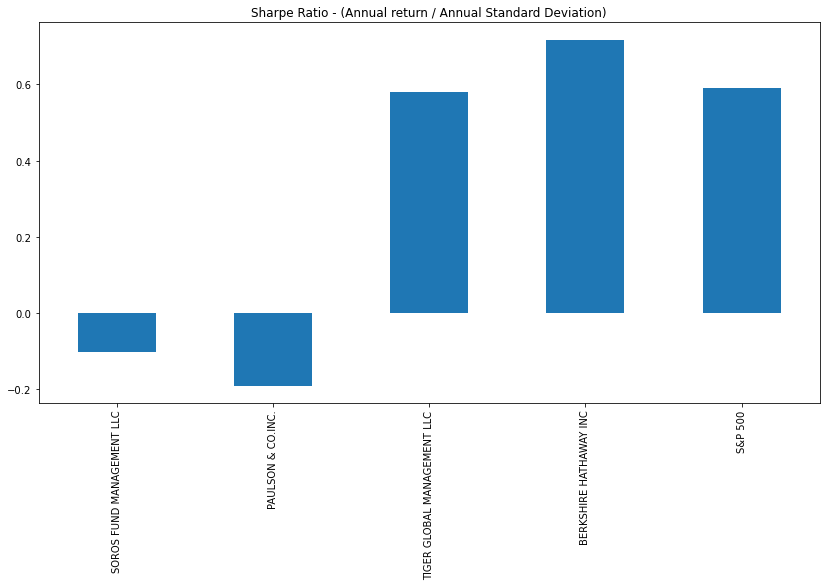

In [15]:
# Visualize the Sharpe ratios as a bar chart
# Include a title parameter and adjust the figure size
sharpe_ratio.plot.bar(figsize=(14,7), title = "Sharpe Ratio - (Annual return / Annual Standard Deviation)")

Question Which of the four portfolios offers the best risk-return profile? Which offers the worst?

Answer # Despite its volatility, Berkshire Hathaway offers the best risk-return profile.

Diversify the Portfolio

In [16]:
# Calculate the variance of the S&P 500 using a rolling 60-day window.
rolling_variance = daily_returns['S&P 500'].rolling(window=60).var()

rolling_variance

date
2014-10-02         NaN
2014-10-03         NaN
2014-10-06         NaN
2014-10-07         NaN
2014-10-08         NaN
                ...   
2020-09-04    0.000103
2020-09-08    0.000116
2020-09-09    0.000120
2020-09-10    0.000121
2020-09-11    0.000120
Name: S&P 500, Length: 1497, dtype: float64

Portfolio 1 - Berkshire Hathaway

In [17]:

# Calculate the covariance using a 60-day rolling window 
# Review the last five rows of the covariance data
rolling_brk_covariance = daily_returns['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(daily_returns['S&P 500'])
rolling_brk_covariance.tail()

date
2020-09-04    0.000021
2020-09-08    0.000023
2020-09-09    0.000024
2020-09-10    0.000024
2020-09-11    0.000024
dtype: float64

In [18]:
# Calculate the beta based on the 60-day rolling covariance compared to the market (S&P 500)
# Review the last five rows of the beta information
rolling_brk_beta = rolling_brk_covariance / rolling_variance
rolling_brk_beta.tail()

date
2020-09-04    0.207879
2020-09-08    0.203051
2020-09-09    0.196632
2020-09-10    0.197543
2020-09-11    0.199411
dtype: float64

In [19]:
# Calculate the average of the 60-day rolling beta
rolling_brk_beta.mean()

0.2214986101354593

<AxesSubplot:title={'center':'Berkshire Hathaway - 60 day Rolling Beta'}, xlabel='date'>

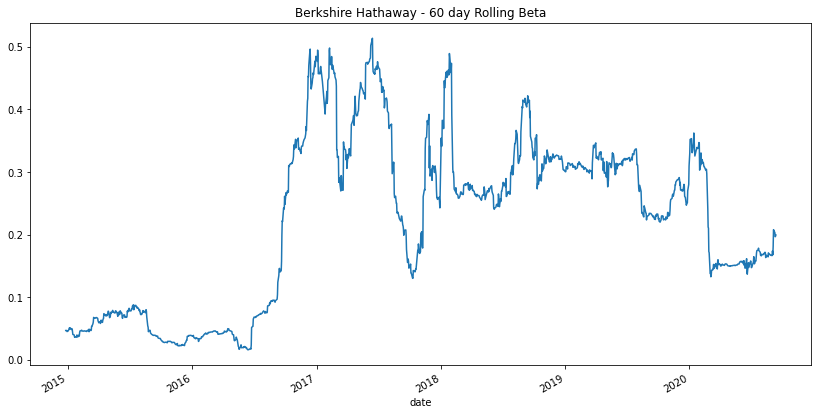

In [20]:
# Plot the rolling beta 
# Include a title parameter and adjust the figure size
rolling_brk_beta.plot(figsize=(14,7), title = "Berkshire Hathaway - 60 day Rolling Beta")

Portfolio 2 - Tiger Global Management

In [21]:
# Calculate the covariance using a 60-day rolling window 
# Review the last five rows of the covariance data
rolling_tgr_covariance = daily_returns['TIGER GLOBAL MANAGEMENT LLC'].rolling(window=60).cov(daily_returns['S&P 500'])
rolling_tgr_covariance.tail()

date
2020-09-04    0.000008
2020-09-08    0.000009
2020-09-09    0.000010
2020-09-10    0.000010
2020-09-11    0.000010
dtype: float64

In [22]:
rolling_tgr_beta = rolling_tgr_covariance / rolling_variance
rolling_tgr_beta.tail()

date
2020-09-04    0.081061
2020-09-08    0.076672
2020-09-09    0.079575
2020-09-10    0.080934
2020-09-11    0.081378
dtype: float64

In [23]:
rolling_tgr_beta.mean()

0.03093001487238774

<AxesSubplot:title={'center':'Tiger Global- 60 day Rolling Beta'}, xlabel='date'>

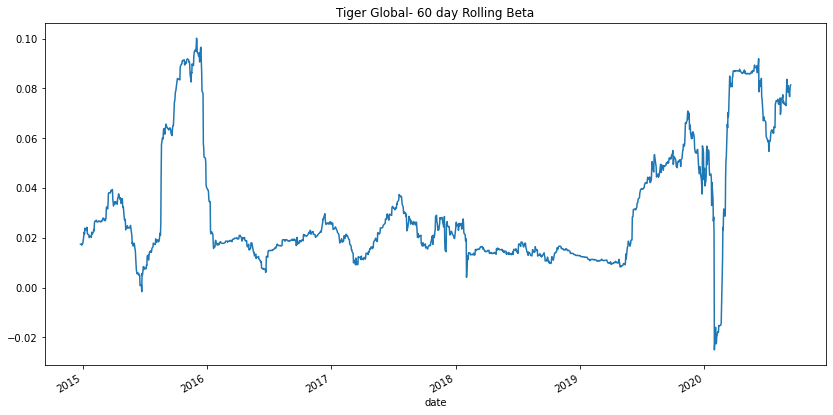

In [24]:
# Plot the rolling beta 
# Include a title parameter and adjust the figure size
rolling_tgr_beta.plot(figsize=(14,7), title = "Tiger Global- 60 day Rolling Beta")

**Question 1** Which of the two portfolios seem more sensitive to movements in the S&P 500?
    
**Answer 1** # Berkshire Hathaway and the Paulson fund seem more sensitive to the movements of the S&P 500. 

**Question 2** Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?
    
**Answer 2** # Primarily interpreting the result of the Sharpe ratio taking into account both risk and return I would have to recommend Berkshire Hathaway and the Tiger fund.